Kilian Cannet - Noe Boonstra

# Importation

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
print("Done")

Done


# Chargement données

In [3]:
# https://www.kaggle.com/priteshshrivastava/sample-github-code
data = pd.read_csv("sample_code.csv", lineterminator='\n',names=['content','lang'])
data.head(10)

,content,lang
0,content,type
1,// Utility.cs\n//\n\nusing System;\nusing Syst...,cs
2,\n{$options.identity.sitename} - Your Accounts...,txt
3,"{\n ""name"": ""opulence/sessions"",\n ""descript...",json
4,package io.mycat.backend.postgresql.packet;\r\...,java
5,TAPi18n._afterUILanguageChange = function() {\...,js
6,"filter:\n paths: [""src/*""]\ntools:\n ext...",yml
7,/**\n * \n */\npackage org.openrtb.dsp.intf.mo...,java
8,"{% extends ""json/page.json"" %}\n{% block title...",json
9,<?php\n\nnamespace JMS\SecurityExtraBundle\Sec...,php


### Filtrage des donnees

In [4]:
# Reduire taille trop grande
# Todo voir si utile
len_cond = [True if 20<=len(s)<=10000 else False for s in data['content']]
data = data[len_cond]

#Filtrer
lang = ['csv', 'txt', 'java', 'cs', 'py', 'cpp','c','js','php']
data = data[data['lang'].isin(lang)]

data_trim= pd.DataFrame(data=data)

'''
for l in lang:
    lang_trim = data[data['lang'] ==l].sample(50000,random_state = 100)
    data_trim = data_trim.append(lang_trim)
'''
#Melanger
data_shuffle = data_trim.sample(frac=1)

maxim = data_shuffle.shape[0]
percent = 0.8
part = int(maxim*percent)
train = data_shuffle[0:part]
valid = data_shuffle[part:maxim]

In [5]:
print("taille du training : ",train.shape[0])
print("taille du validation : ",valid.shape[0])

taille du training :  161579
taille du validation :  40395


# Training avec Modeles

#### Comparaison modeles

In [6]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

import matplotlib.pyplot as plt

In [7]:
#[!] Attention ce script prend BEAUCOUP de temps
import time


names = [
        "SGD Classif",
        "MultiBayes"
        "AdaBoost",
        "RBF SVM",
         "Decision Tree",
        "Random Forest"
]

classifiers = [
    SGDClassifier(loss='hinge', penalty='l2',
                      alpha=1e-3, random_state=42,
                      max_iter=5, tol=None),
    MultinomialNB(),
    AdaBoostClassifier(n_estimators=5),# ok
    SVC(gamma=2, C=1, max_iter=5),#ok
    DecisionTreeClassifier(max_depth=3),#ok
    RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1)#ok
    
]

rows = []
trainScore = []
validScore = []
i =1

t0 = time.time()
for name, clff in zip(names, classifiers):
    print("Training ... (",i,"/",len(classifiers),")")
    clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', clff),
    ])
    clf.fit(train["content"],train["lang"])
    score = clf.score(train["content"], train["lang"])
    
    trainScore.append(clf.score(train["content"],train["lang"]))
    validScore.append(clf.score(valid["content"],valid["lang"]))
    i = i+1


t1 = time.time()
total = t1-t0
print("duration : ",total)
data= [trainScore, validScore]
ptable = pd.DataFrame(data, columns=names)
display(ptable)

Training ... ( 1 / 6 )
Training ... ( 2 / 6 )
Training ... ( 3 / 6 )
Training ... ( 4 / 6 )


/home/nonoreve/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training ... ( 5 / 6 )
duration :  211.6981315612793


,SGD Classif,MultiBayesAdaBoost,RBF SVM,Decision Tree,Random Forest
0,0.913145,0.876011,0.695270,0.149636,0.653742
1,0.912266,0.846120,0.689689,0.151479,0.649462


## Modele Multi Bayonesien

### Modele Bayonesien a la Main

In [6]:
# Todo, reprendre le modele bayonesien a la main ([!] multi bayesien peut etre different de bayesien)

### Modele Bayonesien Sklearn

In [8]:
clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB())])

clf = clf.fit(train["content"],train["lang"])

print(clf.score(train["content"],train["lang"]))
print(clf.score(valid["content"],valid["lang"]))


0.8760111153058256
0.8461195692536205


## Modele SGDClassifier

In [9]:
clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                      alpha=1e-3, random_state=42,
                      max_iter=5, tol=None)),
])

clf = clf.fit(train["content"],train["lang"])

print(clf.score(train["content"],train["lang"]))
print(clf.score(valid["content"],valid["lang"]))


0.9131446536988098
0.912266369600198


In [22]:
print(valid.columns)
print(valid.head(2))
print()
print(ptable.columns)
print(ptable.head(2))
print()
print(lang)

Index(['content', 'lang'], dtype='object')
                                                  content lang
320557  using System;\nusing MrCMS.Website;\n\nnamespa...   cs
322428  from setuptools import setup\n\nsetup(\n    na...   py

Index(['SGD Classif', 'MultiBayesAdaBoost', 'RBF SVM', 'Decision Tree',
       'Random Forest'],
      dtype='object')
   SGD Classif  MultiBayesAdaBoost   RBF SVM  Decision Tree  Random Forest
0     0.913145            0.876011  0.695270       0.149636       0.653742
1     0.912266            0.846120  0.689689       0.151479       0.649462

['csv', 'txt', 'java', 'cs', 'py', 'cpp', 'c', 'js', 'php']


# Recherche hyperparametre :

#### Nos Recherches

In [ ]:
#Todo hyperparametre (use_idf, alpha, C ...)
# Todo graphe differents hyperparametre

#### Recherche avec GridSearchCV

In [ ]:
#Todo
#determiner meilleur hyperparam avec GridSearchCV

# Analyse des resultat

[[  39  148   21    2    2    0    1   88    2]
 [   0 4229  227   45  106    7   28  638   81]
 [   0   11 7810    3    2    0    5    8   12]
 [   1    9  213 4272    1    0    3   18    5]
 [   0   82  182    9 3490    1    0  105    6]
 [   0   63   86  114   10  545  387  121   17]
 [   0   66   35    3   10    3 1764   81    9]
 [   0   63   87   10   61    0    0 9559   27]
 [   0   24   54    4   10    0    1  126 5143]]


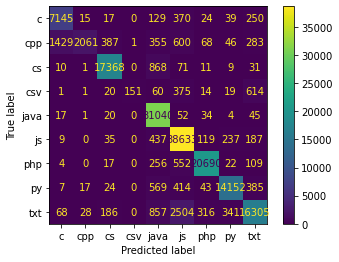

In [27]:
# Matrice de confusion
y_true = valid["lang"]
y_pred = clf.predict(valid["content"])
print(confusion_matrix(y_true, y_pred, labels=lang))
plot_confusion_matrix(clf, train["content"], train["lang"])
plt.show()
#Todo accuracy test

In [10]:
y_true =  valid["lang"]
y_pred = clf.predict(valid["content"])
target_names = lang
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         csv       0.81      0.89      0.85      1971
         txt       0.98      0.41      0.57      1343
        java       0.96      0.94      0.95      4522
          cs       0.97      0.13      0.23       303
          py       0.90      0.99      0.94      7851
         cpp       0.89      0.97      0.93      9807
           c       0.97      0.96      0.96      5362
          js       0.95      0.90      0.92      3875
         php       0.90      0.79      0.84      5361

    accuracy                           0.91     40395
   macro avg       0.92      0.78      0.80     40395
weighted avg       0.92      0.91      0.91     40395

